<a href="https://www.kaggle.com/code/wcromar/pytorch-xla-2-0-on-kaggle?scriptVersionId=124841632" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# PyTorch/XLA 2.0 on Kaggle

Starting with PyTorch/XLA 2.0, we support the new Kaggle TPU VM accelerator! See the [Kaggle TPU VM announcement](https://www.kaggle.com/discussions/product-feedback/369338) for more details.

In [1]:
!python --version

Python 3.8.16


In [2]:
import torch
torch.__version__

'2.0.0+cu117'

In [3]:
import torch_xla
torch_xla.__version__

'2.0'

Note: Kaggle uses the beta PJRT runtime by default. For more information about PJRT, see the [PyTorch/XLA documentation](https://github.com/pytorch/xla/blob/r2.0/docs/pjrt.md).

In [4]:
import os
os.getenv('PJRT_DEVICE')

'TPU'

## Example

For this example, we'll use the [HuggingFace Diffusers](https://huggingface.co/docs/diffusers/index) implementation of Stable Diffusion to generate an image according to your prompt.

In [ ]:
!pip install accelerate diffusers transformers

In [ ]:
from diffusers import DiffusionPipeline
import torch_xla.core.xla_model as xm

pipeline = DiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5")
# Move the model to the first TPU core
pipeline = pipeline.to(xm.xla_device())

In [7]:
# Modify this prompt with your own example!
prompt = "a cloud tpu winning a kaggle competition"

100%|██████████| 50/50 [03:55<00:00,  4.70s/it]


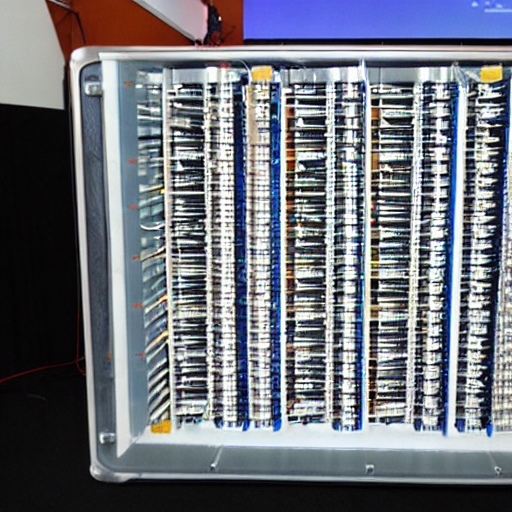

In [8]:
generator = torch.Generator().manual_seed(0)
# `torch_xla.sync()` compiles and executes the graph after each iteration.
# The first few steps will be much slower than the rest.
image = pipeline(prompt, callback=lambda *args: torch_xla.sync(), generator=generator).images[0]
image

Keep an eye out for more Kaggle examples with PyTorch/XLA!